In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
from statistics import mean
import statsmodels.api as sm

In [2]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()

In [3]:
## chargement et affichage des données
#data = pd.read_csv('../data.csv')
#def classify_bmi(row):
#    if row["bmi"] < 18.5:
#        return "underweight"
#    elif row["bmi"] < 25:
#        return "normal"
#    elif row["bmi"] < 30:
#        return "overweight"
#    elif row["bmi"] < 35:
#        return "obese"
#    else:
#        return "severely obese"
#data["bmi_class"] = data.apply(classify_bmi, axis=1)
## Remove duplicates from the 'data' DataFrame
#df = data.drop_duplicates()
## Drop Bmi
#df.drop("bmi", axis=1, inplace=True)

In [4]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]
# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])
metrics = []

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test




len(X_train) : 1069


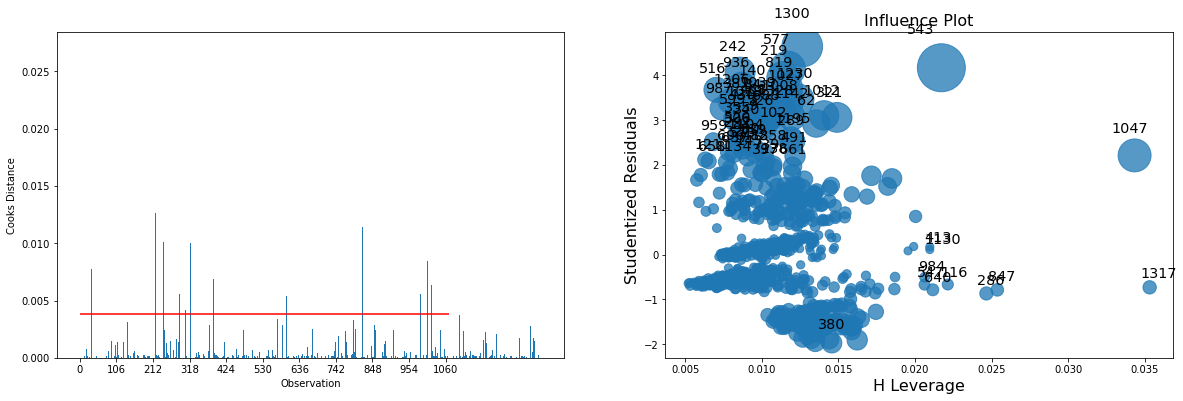

Removed :  -46 values


In [5]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)
last_len_X_train = len(X_train)
print(f"len(X_train) : {len(X_train)}")
index_to_be_removed = my_functions.get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=preprocessor, divided_by="ALL")
X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)
print(f"Removed :  {len(X_train) - last_len_X_train} values")

In [6]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, LR_model_1 = my_functions.LR_with_CV(PolynomialFeatures_degree = 1, 
                    X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                    preprocessor = preprocessor, shuffle=True, random_state=42,
                    isplot = False, isinfo = False, include_learning_curve = False) 
    
metrics.append(["LR with Kfold CV (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                    Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])



In [7]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, LR_model_2 = my_functions.LR_with_CV(PolynomialFeatures_degree = 2, 
                    X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                    preprocessor = preprocessor, shuffle=True, random_state=42,
                    isplot = False, isinfo = False, include_learning_curve = False) 
    
metrics.append(["LR with Kfold CV (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, 
                    Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])

In [8]:
################################
################################
#
# Get best Hypermarameters
#
################################
################################


#my_functions.get_best_params(
#    PolynomialFeatures_degree = 2,  
#    model=Lasso(max_iter=100000, 
#    tol=0.0001,
#    random_state=42, 
#    selection='cyclic'),   
#    param_grid= {'lasso__alpha': np.linspace(30,40,200)}, 
#    preprocessor = preprocessor, 
#    X_train = X_train, 
#    y_train = y_train)


In [9]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Lasso_model_1 = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 1, Best_alpha= 39.4321608040201,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 


metrics.append(["LASSO (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [10]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Lasso_model_2 = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 2, Best_alpha= 39.4321608040201,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 


metrics.append(["LASSO (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])

In [11]:
#best = my_functions.get_best_params(PolynomialFeatures_degree = 1,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(1,3,200)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)
#best

In [12]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Ridge_model_1 = my_functions.Ridge_with_CV(PolynomialFeatures_degree = 1, Best_alpha=  1.4623115577889447,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 

metrics.append(["Ridg (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [13]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Ridge_model_2 = my_functions.Ridge_with_CV(PolynomialFeatures_degree = 2, Best_alpha=  1.4623115577889447,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42,
                isplot = False, isinfo = False, include_learning_curve = False) 

metrics.append(["Ridg (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])


In [14]:
# best = my_functions.get_best_params(PolynomialFeatures_degree = 2,  model=ElasticNet(max_iter=100000, tol=0.0001,random_state=42),   param_grid = {'elasticnet__alpha': np.linspace(49, 51, 200), 
#                 'elasticnet__l1_ratio': [0.9999999]}, 
#                 preprocessor = preprocessor, X_train = X_train, y_train = y_train)

In [15]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Best_elasticnet__l1_ratio, ElasticNet_model_1 = my_functions.ElasticNet_with_CV(PolynomialFeatures_degree =1, Best_alpha = 33.24120603015076, 
    Best_elasticnet__l1_ratio = 0.9999999, 
    X_train = X_train, y_train = y_train 
    , X_test = X_test , y_test = y_test, 
    preprocessor = preprocessor , shuffle=True, 
    random_state=42, isplot= False, isinfo = False, include_learning_curve = False)

metrics.append(["ElasticNet (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)} Best_ratio : {round(Best_elasticnet__l1_ratio,3)}"])

In [16]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha, Best_elasticnet__l1_ratio, ElasticNet_model_2 = my_functions.ElasticNet_with_CV(PolynomialFeatures_degree =2, Best_alpha = 50.00502512562814, 
    Best_elasticnet__l1_ratio = 0.9999999, 
    X_train = X_train, y_train = y_train 
    , X_test = X_test , y_test = y_test, 
    preprocessor = preprocessor , shuffle=True, 
    random_state=42, isplot= False, isinfo = False, include_learning_curve = False)

metrics.append(["ElasticNet (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}  Best_ratio : {round(Best_elasticnet__l1_ratio,3)}"])

In [17]:

df_result = pd.DataFrame()
df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy", 'HyperParamter']).sort_values(['CV Accuracy'] , ascending=False, ignore_index=True).set_index('Model')
#df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy"]).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
df_result

,R2,MAE,RMSE,Score (test),Score (trainging),CV Accuracy,HyperParamter
Model,,,,,,,
LASSO (Polynomial degree=2),0.9167,1406.289577,3284.148115,0.925181,0.931742,0.9289 (+/- 0.03),Best_alpha : 39.432
ElasticNet (Polynomial degree=2),0.9163,1418.113006,3286.189294,0.925088,0.931480,0.9289 (+/- 0.03),Best_alpha : 50.005 Best_ratio : 1.0
Ridg (Polynomial degree=2),0.9156,1405.073555,3316.223550,0.923712,0.933860,0.9260 (+/- 0.03),Best_alpha : 1.462
LR with Kfold CV (Polynomial degree=2),0.9156,1422.812646,3316.640981,0.923693,0.933935,0.9076 (+/- 0.05),None
LASSO (Polynomial degree=1),0.7717,3862.598915,5146.517520,0.816263,0.827428,0.8217 (+/- 0.02),Best_alpha : 39.432
ElasticNet (Polynomial degree=1),0.7723,3870.753779,5149.934507,0.816019,0.827520,0.8217 (+/- 0.02),Best_alpha : 33.241 Best_ratio : 1.0
Ridg (Polynomial degree=1),0.7740,3909.130917,5166.050964,0.814866,0.827780,0.8211 (+/- 0.02),Best_alpha : 1.462
LR with Kfold CV (Polynomial degree=1),0.7756,3916.188022,5168.887972,0.814663,0.827796,0.8210 (+/- 0.02),None


In [18]:
import pickle

pickle_out = open("Lasso_Model.pkl", "wb") 
pickle.dump(Lasso_model_2, pickle_out) 
pickle_out.close()